Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Support Vectors:
 [[-0.72671348 -0.16040258]
 [ 0.04229549  0.90894796]
 [-1.49572245 -1.65749334]
 [-0.88051527 -0.16040258]
 [-0.1115063   0.69507785]
 [ 0.81130447  0.69507785]
 [ 0.19609729 -0.16040258]
 [-0.88051527 -1.44362323]
 [-0.41910989 -0.80201291]
 [-0.1115063  -0.16040258]]


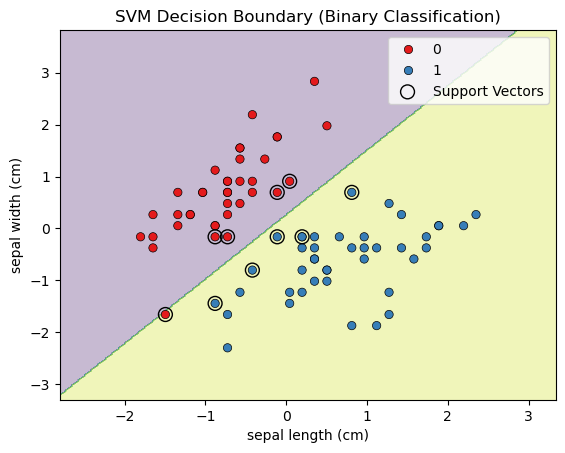

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only first two features for visualization
y = iris.target

# Filter for only 2 classes: Setosa (0) and Versicolor (1)
X = X[y != 2]  # Remove class 2 (Virginica)
y = y[y != 2]  # Keep only classes 0 and 1

# Splitting dataset into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model with linear kernel (best for binary classification)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Print Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nSupport Vectors:\n", svm_model.support_vectors_)

# Decision boundary visualization
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.title("SVM Decision Boundary (Binary Classification)")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, svm_model)
